# Taller 3 - Aprendizaje por Reforzamiento
## Catalina Piedrahita Jaramillo
## Daniel José Rueda Lobato
## Diego Andrés Valderrama

Reinforcement Learning on google colab (frozenlake)

https://colab.research.google.com/github/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q_Learning_with_FrozenLakev2.ipynb#scrollTo=Bt8UsREaBNkJ

https://towardsdatascience.com/my-journey-to-reinforcement-learning-part-1-q-learning-with-table-35540020bcf9

https://analyticsindiamag.com/openai-gym-frozen-lake-beginners-guide-reinforcement-learning/

https://www.kaggle.com/sarjit07/reinforcement-learning-using-q-table-frozenlake

## Técnica empleada - Q-Learning

Q-learning es una técnica de aprendizaje por refuerzo utilizada en aprendizaje automático. El objetivo del Q-learning es aprender una serie de normas que le diga a un agente qué acción tomar bajo qué circunstancias. No requiere un modelo del entorno y puede manejar problemas con transiciones estocásticas y recompensas sin requerir adaptaciones.



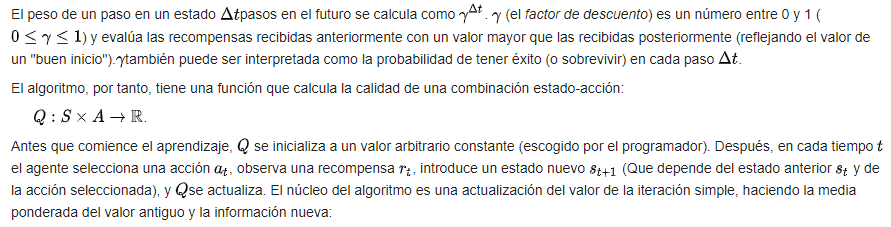

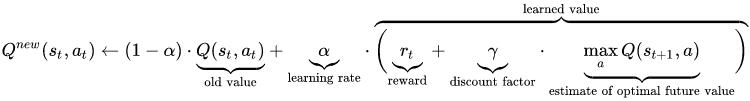

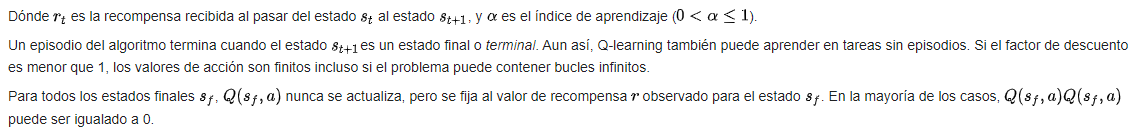

## Algoritmo Utilizado - Frozenlake

El entorno de Frozen Lake es una cuadrícula de 4 × 4 que contiene cuatro áreas posibles: Safe (S), Frozen (F), Hole (H) y Goal (G). El agente se mueve alrededor de la cuadrícula hasta que llega a la meta o al hoyo. Si cae en el agujero, tiene que empezar desde el principio y se le recompensa con el valor 0. El proceso continúa hasta que aprende de cada error y finalmente alcanza la meta. Aquí hay una descripción visual de la cuadrícula de Frozen Lake (4 × 4):

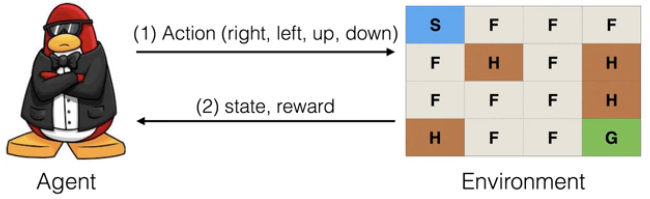

El agente en el entorno tiene cuatro movimientos posibles: arriba, abajo, izquierda y derecha. Implementaremos una de las técnicas de aprendizaje por refuerzo, Q-Learning, aquí. Este entorno permitirá que el agente se mueva en consecuencia. Podría ocurrir una acción aleatoria una vez cada pocos episodios; digamos que el agente se desliza en diferentes direcciones porque es difícil caminar sobre una superficie congelada. Teniendo en cuenta esta situación, debemos permitir algún movimiento aleatorio al principio, pero eventualmente intentaremos reducir su probabilidad. De esta forma podemos corregir el error causado minimizando la pérdida.

## Paso -1: Instalamos las librerias necesarias

In [1]:
!pip install numpy
!pip install gym

## Paso - 1a: Importamos las dependencias 📚
- `Numpy` para nuestra Qtable
- `OpenAI Gym` para el ambiente de FrozenLake
- `Random` para generar los numeros aleatorios

In [2]:
import numpy as np
import gym
import random

## Paso 2: Definimos el ambiente 🎮
- Aquí crearemos el entorno de FrozenLake 4x4. 
- OpenAI Gym es una biblioteca compuesta de muchos entornos que podemos usar para entrenar a nuestros agentes.
- En nuestro caso elegimos usar Frozen Lake.

In [3]:
env = gym.make("FrozenLake-v0")

## Paso 3: Creamos la Q-tabla y la inicializamos 🗄️

- Crearemos nuestra tabla Q, para saber cuántas filas (estados) y columnas (acciones) necesitamos, necesitamos calcular el tamaño_de_acción y el tamaño_de_estado
-  OpenAI Gym nos proporciona una forma de hacerlo: `env.action_space.n` y `env.observation_space.n`

In [4]:
action_size = env.action_space.n
state_size = env.observation_space.n

In [5]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Paso 4: Creamos los hiperparametros ⚙️

In [6]:
total_episodes = 1000        # Total episodios. 20000 iniciales
learning_rate = 0.9          # Tasa de aprendizaje
max_steps = 99               # Número máximo de pasos por episodio
gamma = 0.9                  # Tasa de descuento

# Parámetros de exploración
epsilon = 1.0                 # Tasa de exploración
max_epsilon = 1.0             # Probabilidad de exploración al inicio
min_epsilon = 0.01            # Probabilidad de exploración al inicio 
decay_rate = 0.005            # Tasa de decrecimiento exponencial

steps_total = []
rewards_total = []
egreedy_total = []

## Paso 5: El algoritmo Q learning 🧠
- Ahora implementamos el algoritmo Q learning :


In [7]:
# Lista de recompensas
rewards = []

# Para siempre o hasta que el aprendizaje se detenga
for episode in range(total_episodes):
    # Resetiamos el ambiente
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0    

    for step in range(max_steps):
        # 3.Elige una acción en su mundo actual
        ## Inicialmente se genera un numero aleatorio
        exp_exp_tradeoff = random.uniform(0, 1)        

        ## Si el numero es mayor al epsilon --> Realiza explotación (tomando el mayor valor Q para este estado)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
            #print(exp_exp_tradeoff, "action", action)

        # De lo contrario hace una elección al azar --> Exploración
        else:
            action = env.action_space.sample()
            #print("action random", action)                            

        # Toma la acción (a) y observa los estados de resultado y la recompensa (r)
        new_state, reward, done, info = env.step(action)

        # Actualiza Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : todas las acciones que podemos tomar desde el nuevo estado
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])        
        total_rewards += reward        

        # Nuestro nuevo estado es State
        state = new_state              

        # terminar el episodio
        if done == True:
            steps_total.append(step)
            rewards_total.append(reward)
            egreedy_total.append(epsilon)
            break        

    # Se reduce el épsilon (porque necesitamos cada vez menos exploración)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
    
#print ("Puntuación a lo largo del tiempo: " +  str(sum(rewards)/total_episodes))
print(qtable)

[[0.2360832  0.16076746 0.14469451 0.14553306]
 [0.04905184 0.05125974 0.0484457  0.14185399]
 [0.07797216 0.14948744 0.07850493 0.06533305]
 [0.00899481 0.01238564 0.0225021  0.11242852]
 [0.25190416 0.13693589 0.11421015 0.11098473]
 [0.         0.         0.         0.        ]
 [0.21007364 0.05167737 0.05108188 0.02100821]
 [0.         0.         0.         0.        ]
 [0.17199947 0.18897203 0.13141217 0.34114629]
 [0.26802236 0.44500714 0.20448731 0.13713239]
 [0.55616559 0.21336943 0.19478396 0.08827868]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.29254161 0.24804756 0.57861594 0.21008289]
 [0.3287257  0.48813484 0.75511233 0.52309642]
 [0.         0.         0.         0.        ]]


## Exploracion vs Explotación

*   Elegir la acción a tomar usando una política ambiciosa - 𝜖:
*   Es una política muy simple de elegir acciones usando las estimaciones actuales del valor Q. De la siguiente manera:
*   Con probabilidad (1- ϵ) elige la acción que tiene el mayor valor Q.
*   Con probabilidad (ϵ) elige cualquier acción al azar.


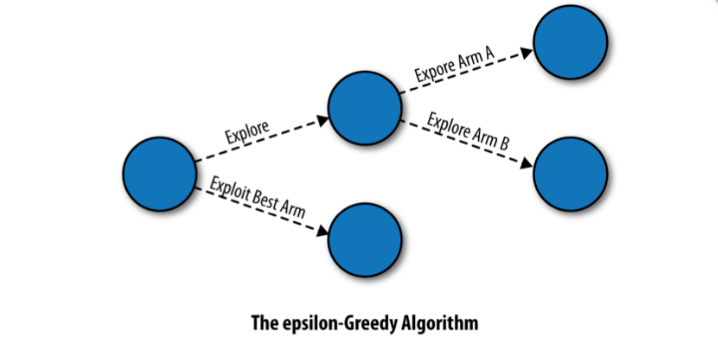

## Paso 6: Usamos nuestra Q-table para Jugar FrozenLake ! 👾
- Despues de 10000 repeticiones, Nuestra Q-table puede ser usada como "truco" para jugar FrozenLake"
- Al ejecutar estas lineas se puede ver a nuestro agente jugando a FrozenLake.

In [8]:
env.reset()

for episode in range(20):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODIO ", episode)

    for step in range(max_steps):
                
        # Toma la acción (índice) que tiene la máxima recompensa futura esperada 
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:            
            # Aquí, decidimos imprimir sólo el último estado (para ver si nuestro agente está en la meta o cae en un agujero)
            env.render()
            if new_state == 15:
                print("Alcanzamos nuestro objetivo 🏆")
            else:
                print("Caímos en un agujero ☠️")
            
            # Se imprime el numero de pasos en que finalizó.
            print("Numero de pasos", step)
            
            break
        state = new_state
env.close()

****************************************************
EPISODIO  0
  (Right)
SFFF
FHFH
FFFH
HFFG
Alcanzamos nuestro objetivo 🏆
Numero de pasos 20
****************************************************
EPISODIO  1
  (Left)
SFFF
FHFH
FFFH
HFFG
Caímos en un agujero ☠️
Numero de pasos 32
****************************************************
EPISODIO  2
  (Right)
SFFF
FHFH
FFFH
HFFG
Alcanzamos nuestro objetivo 🏆
Numero de pasos 15
****************************************************
EPISODIO  3
  (Right)
SFFF
FHFH
FFFH
HFFG
Alcanzamos nuestro objetivo 🏆
Numero de pasos 76
****************************************************
EPISODIO  4
****************************************************
EPISODIO  5
  (Right)
SFFF
FHFH
FFFH
HFFG
Alcanzamos nuestro objetivo 🏆
Numero de pasos 47
****************************************************
EPISODIO  6
  (Left)
SFFF
FHFH
FFFH
HFFG
Caímos en un agujero ☠️
Numero de pasos 36
****************************************************
EPISODIO  7
  (Right)
SFFF
FHFH


In [9]:
print("Porcentaje de episodios finalizados satisfactoriamente: {0}".format(sum(rewards_total)/total_episodes))
print("Porcentaje de episodios finalizados satisfactoriamente (Últimos 100 episodios): {0}".format(sum(rewards_total[-100:])/100))

print("Promedio de pasos: %.2f" % (sum(steps_total)/total_episodes))
print("Promedio de pasos (Últimos 100 episodios): %.2f" % (sum(steps_total[-100:])/100))

Porcentaje de episodios finalizados satisfactoriamente: 0.296
Porcentaje de episodios finalizados satisfactoriamente (Últimos 100 episodios): 0.64
Promedio de pasos: 21.33
Promedio de pasos (Últimos 100 episodios): 31.61


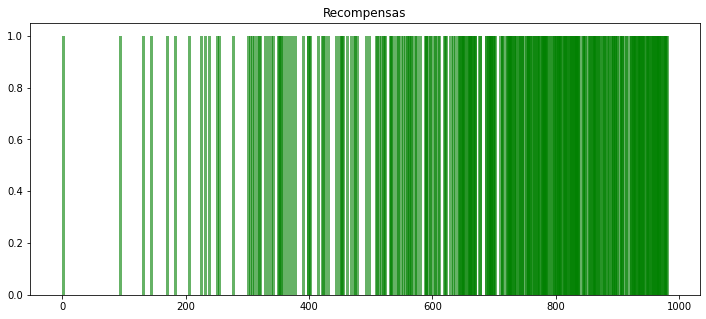

In [10]:
import torch
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.title("Recompensas")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green', width=5)
plt.show()

Grafico del total de recompensas. Se puede apreciar que aumenta conforme aumenta el número de episodios

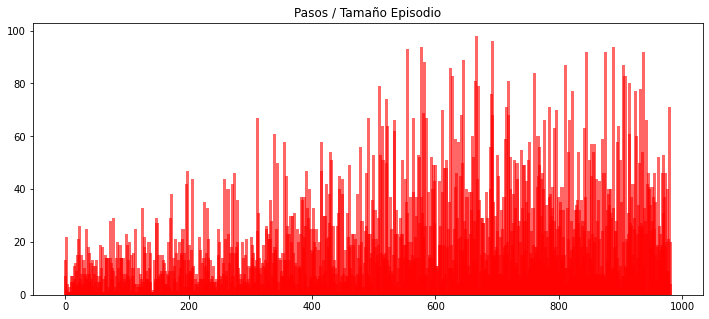

In [11]:
plt.figure(figsize=(12,5))
plt.title("Pasos / Tamaño Episodio")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red', width=5)
plt.show()

Aquí, podemos ver que los pasos que se dan en un episodio son considerables porque tenemos una alta acción aleatoria, pero contrastando con el indice de satisfacción, es claro que conforme aumentan los episodios, son mejores los resultados

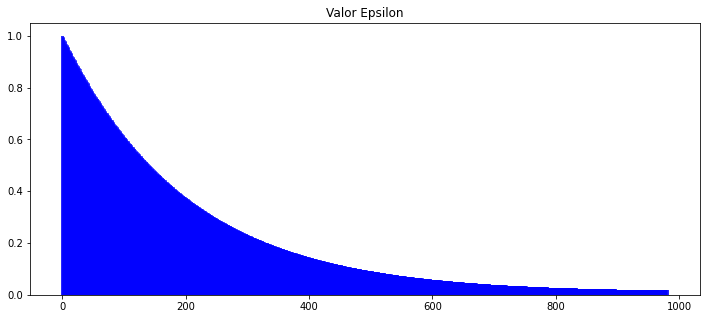

In [12]:
plt.figure(figsize=(12,5))
plt.title("Valor Epsilon")
plt.bar(torch.arange(len(egreedy_total)), egreedy_total, alpha=0.6, color='blue', width=5)
plt.show()

En el gráfico anterior, podemos ver cómo el valor de epsilon (ϵ) se reduce con el tiempo